In [1]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-09 15:41:19--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  9.12MB/s    in 36s     

2021-07-09 15:41:57 (8.46 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [2]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import os,zipfile
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
base_directory = '/tmp/rockpaperscissors/rps-cv-images'

In [4]:
train_datagenerator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest',
    validation_split=0.2
)

test_datagenerator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest',
    validation_split=0.2
)

In [5]:
train_generator = train_datagenerator.flow_from_directory(
    base_directory,
    shuffle=True,
    target_size=(100,150),
    color_mode="rgb",
    subset='training'

)

validation_generator = train_datagenerator.flow_from_directory(
    base_directory,
    shuffle=True,
    target_size=(100,150),
    color_mode="rgb",
    subset='validation'

)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [6]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(3, activation='softmax')                                 
])

In [7]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

In [8]:
model.fit(
    
    train_generator,
    steps_per_epoch=16,  
    epochs=20,
    validation_data=validation_generator, 
    validation_steps=4,  
    verbose=2
    )

Epoch 1/20
16/16 - 11s - loss: 1.0707 - accuracy: 0.4883 - val_loss: 0.9227 - val_accuracy: 0.6250
Epoch 2/20
16/16 - 10s - loss: 0.6708 - accuracy: 0.7237 - val_loss: 0.5010 - val_accuracy: 0.8281
Epoch 3/20
16/16 - 10s - loss: 0.4332 - accuracy: 0.8418 - val_loss: 0.4955 - val_accuracy: 0.8594
Epoch 4/20
16/16 - 10s - loss: 0.3764 - accuracy: 0.8848 - val_loss: 0.2885 - val_accuracy: 0.8906
Epoch 5/20
16/16 - 10s - loss: 0.2890 - accuracy: 0.9245 - val_loss: 0.1690 - val_accuracy: 0.9609
Epoch 6/20
16/16 - 10s - loss: 0.2038 - accuracy: 0.9297 - val_loss: 0.2160 - val_accuracy: 0.9062
Epoch 7/20
16/16 - 10s - loss: 0.2307 - accuracy: 0.9180 - val_loss: 0.1557 - val_accuracy: 0.9531
Epoch 8/20
16/16 - 10s - loss: 0.1996 - accuracy: 0.9344 - val_loss: 0.1159 - val_accuracy: 0.9531
Epoch 9/20
16/16 - 10s - loss: 0.1504 - accuracy: 0.9492 - val_loss: 0.2110 - val_accuracy: 0.9141
Epoch 10/20
16/16 - 10s - loss: 0.2248 - accuracy: 0.9277 - val_loss: 0.2858 - val_accuracy: 0.8906
Epoch 11/

Saving Gai.jpg to Gai.jpg
gambar Gai.jpg adalah gambar :
PAPER


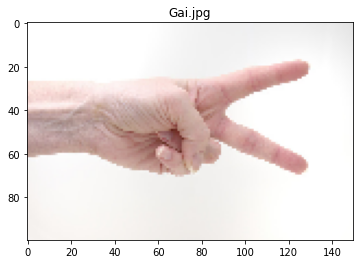

In [9]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(100, 150))
  plt.title(fn)
  imgplot = plt.imshow(img)
  a = image.img_to_array(img)
  a = np.expand_dims(a, axis=0)
  images = np.vstack([a])
  classes = model.predict(images, batch_size=10)
  
  print('gambar', fn,'adalah gambar :')
  if classes[0][0]==1: 
    print('PAPER')
  elif classes[0][1]==1:
    print('ROCK') 
  elif classes[0][2]==1:
    print('SCISSOR')
  else:
    print('tidak diketahui') 



  
  
  

